<a href="https://colab.research.google.com/github/casperg92/CD_fancyplot/blob/main/Plot_CD_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make fancy plots of CD spectra
### A tool by Casper Goverde and Martin "not Steinegger" Paseca

In [16]:
#@title Load functions
### load dependencies
import os, sys
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

!git clone https://github.com/casperg92/CD_fancyplot.git

def plot_CD(csv_file, conversion_factor, min_x, max_x, y_min, y_max, x_min_zoom=None,x_max_zoom=None,y_min_zoom=None,y_max_zoom=None, save_path=None):
    # read csv into pandas df
    df = pd.read_csv(csv_file, header=0, index_col=0)
    df = df.dropna(axis=1, how="all")
    df = df[::-1]
    
    df = df[['20','30','40','50','60','70','80','90']]
    df = df.multiply(conversion_factor)
    
    # plot
    sns.set_theme(style="ticks")
    fig, ax = plt.subplots()
    sns.lineplot(data=df, legend = "full", ax = ax, dashes=False, palette="coolwarm")
    plt.axhline(y=0, color='k', linestyle='--')
    
    ax.set(ylabel = "MRE [deg cm2 dmol-1]", xlabel = "Wavelength [nm]")
    ax.set_xlim([min_x,max_x])
    selected_rows = df.loc[min_x+5:max_x-5]
    
    if x_min_zoom != None:
        ax2 = plt.axes([0.65, 0.638, .25, .25])
        sns.lineplot(data = df, ax = ax2, dashes=False, legend = False, palette="coolwarm")
        ax2.set_box_aspect(0.7)
        ax2.set_title('Zoom')
        ax2.set_xlim([x_min_zoom,x_max_zoom])
        ax2.set_ylim ([y_min_zoom, y_max_zoom])
        ax2.set (xlabel = None)
        ax2.set (ylabel = None)
    
    ax.set_ylim(y_min, y_max)
    
    if save_path != None:
        plt.savefig(save_path)
    plt.show()

def plot_melting(csv_file, conversion_factor, wl, y_min, y_max, measure_interval=5, save_path=None):
    # read csv into pandas df
    df = pd.read_csv(csv_file, header=0, index_col=0)
    df = df.dropna(axis=1, how="all")
    df = df[::-1]
    
    df = df.multiply(conversion_factor)
    
    # plot melting correlationat 212 nm
    df2 = df.copy()
    row_220 = df.loc[wl].transpose()
    x_data = []

    for i in range(20, 20+(measure_interval*len(row_220)), measure_interval):
        x_data.append(i)
    
    sns.set_theme(style="ticks")
    fig, ax = plt.subplots()
    sns.scatterplot(x=x_data,y = row_220, legend = False, s=60, marker="s")
    # sns.lineplot(data=row_220)
    ax.set(ylabel = f"MRE [deg cm2 dmol-1] @{wl} nm", xlabel = "Temperature [°C]")
    
    ax.set_xlim([20,90])
    ax.set_ylim([y_min, y_max])
    
    try:
        # Fit curve
        def sigmoid(x, Top, Bottom, IC50, HillSlope):
            y = Bottom + (Top-Bottom)/(1+(IC50/x)**HillSlope)
            return (y)

        p0 = [-12000, -10000, 50, 5] # this is an mandatory initial guess

        popt, pcov = curve_fit(sigmoid, x_data, row_220, p0)

        plt.plot(x_data, sigmoid(x_data, popt[0], popt[1], popt[2], popt[3]))
    except:
        popt = ['undetermined','undetermined','undetermined','undetermined']
        sns.lineplot(x=x_data, y=row_220, palette=['k'])
        
    if save_path != None:
        plt.savefig(save_path)

    plt.show()
    
    print('Top:', popt[0])
    print('Bot:', popt[1])
    print('IC50:', popt[2])
    print('HillSlope:', popt[3])

fatal: destination path 'CD_fancyplot' already exists and is not an empty directory.


In [15]:
number_of_aas = 122
mass = 13.02 # [Kda]
mean_mass_per_residue = (mass*1000)/number_of_aas# [gr/mol]

cell_path_length = 0.1 # [cm]
sample_concentration = 0.3 # [gr/L]

correction_factor = mean_mass_per_residue/(10*sample_concentration*cell_path_length)
print('convert to Mean Residue Ellipticity:', correction_factor)

convert to Mean Residue Ellipticity: 355.7377049180327


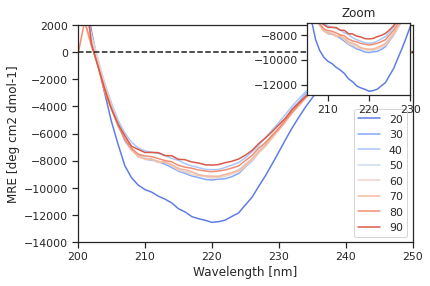

In [14]:
csv_file = '/content/CD_fancyplot/CD_melting_example.csv'

conversion_factor = 357.2164948453608
x_min = 200
x_max = 250
y_min = -14000
y_max = 2000
x_min_zoom = 205
x_max_zoom = 230
y_min_zoom = -12800
y_max_zoom = -7000

save_path = None

df = plot_CD(csv_file, conversion_factor, x_min, x_max, y_min, y_max,x_min_zoom,x_max_zoom,y_min_zoom,y_max_zoom, save_path)

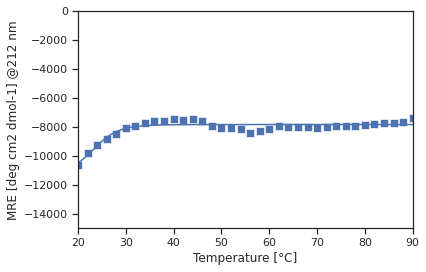

Top: -7841.821926457167
Bot: -10990.83942028738
IC50: 23.647149167263105
HillSlope: 10.201851506244363


In [11]:
wl = 212 # wavelength [nm]
y_min = -15000
y_max = 0
measure_interval=2

save_path = None

plot_melting(csv_file, conversion_factor, wl, y_min, y_max, measure_interval, save_path)